In [1]:
#!pip install sounddevice
import pandas as pd
import numpy as np
from skimage.feature import greycomatrix, greycoprops
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sounddevice as sd
from PIL import Image

In [55]:
#steps:
#1 siapkan rekaman
#2 ambil spektrogram dari masing2 rekaman
#3 ambil nilai glcm dari semua spektogram, simpan di 1 csv
#4 csv tadi jadi dataset, lalu linear regression


In [2]:
from pydub import AudioSegment
!pip install audiosegment
import audiosegment

processing: hai: Recording (10).wav


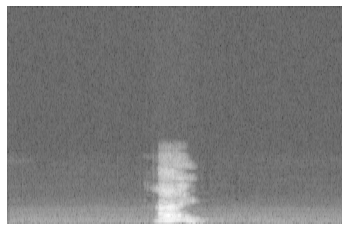

processing: hai: Recording (2).wav


C:\Users\igana\anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


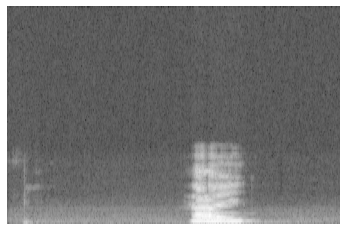

processing: hai: Recording (3).wav


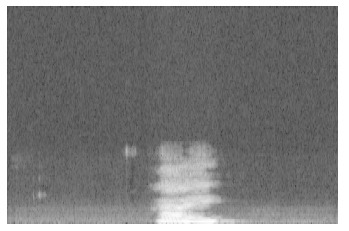

processing: hai: Recording (4).wav


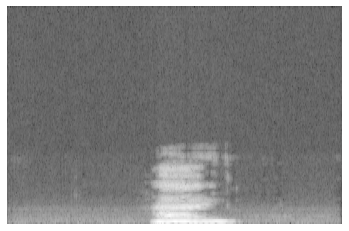

processing: hai: Recording (5).wav


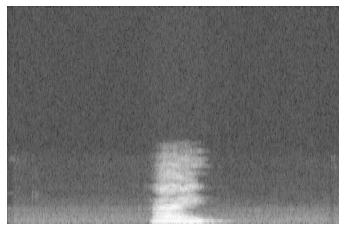

processing: hai: Recording (6).wav


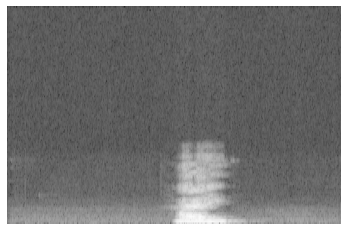

processing: hai: Recording (7).wav


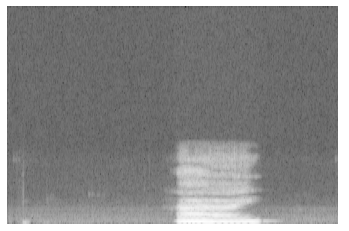

processing: hai: Recording (8).wav


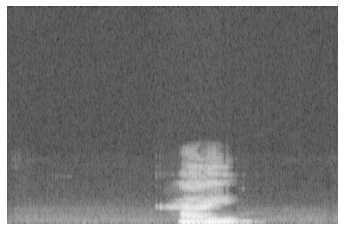

processing: hai: Recording (9).wav


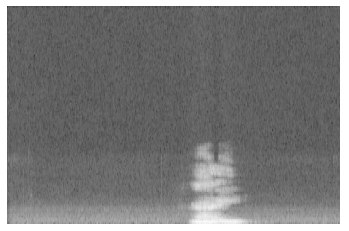

processing: hai: Recording.wav


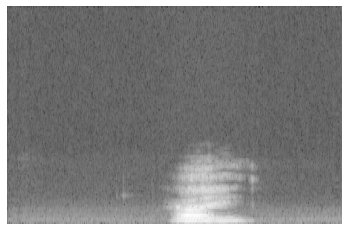

processing: halo: Recording (10).wav


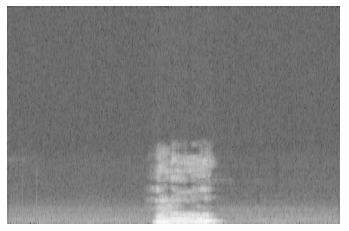

processing: halo: Recording (2).wav


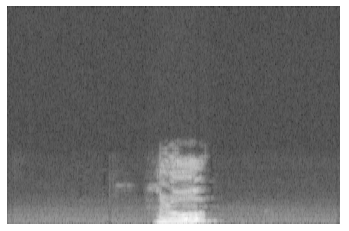

processing: halo: Recording (3).wav


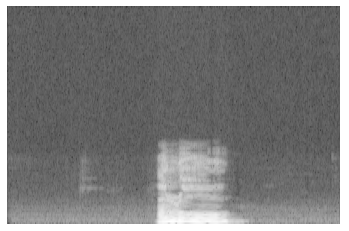

processing: halo: Recording (4).wav


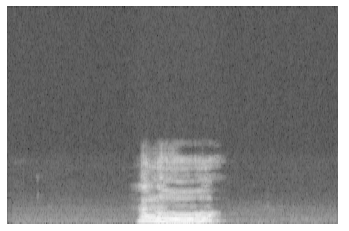

processing: halo: Recording (5).wav


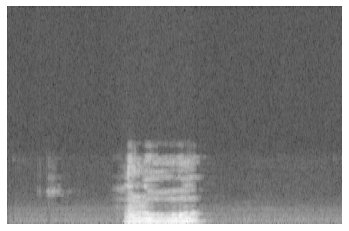

processing: halo: Recording (6).wav


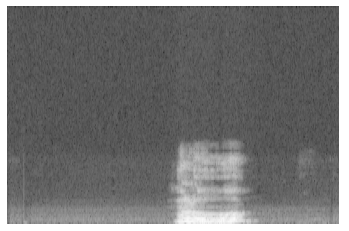

processing: halo: Recording (7).wav


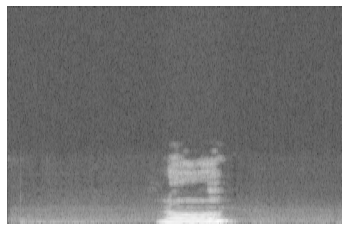

processing: halo: Recording (8).wav


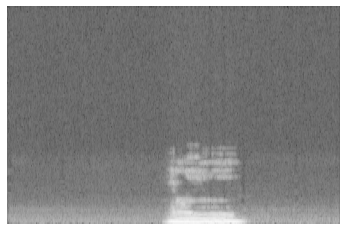

processing: halo: Recording (9).wav


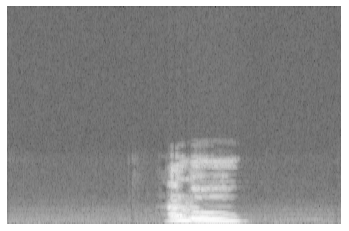

processing: halo: Recording.wav


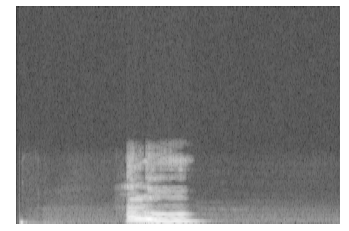

In [57]:
import matplotlib.pyplot as plot
import wave
import os
from scipy.io import wavfile

dataset='./dataset'
for folders in os.listdir(dataset):
    lala=0
    for files in os.listdir(dataset+'/'+folders):
         print('processing: '+folders+': '+files)
         sound = AudioSegment.from_wav(dataset+'/'+folders+'/'+files)
         sound = sound.set_channels(1)
         sound.export(dataset+'/'+folders+'/'+str(lala)+'.wav', format="wav")
         samplingFrequency, signalData = wavfile.read(dataset+'/'+folders+'/'+str(lala)+'.wav')
         fitur=plot.specgram(signalData,Fs=samplingFrequency,cmap='gray')
         plot.axis('off')
         plot.savefig('./specgram/'+folders+'/'+str(lala)+'.jpg', bbox_inches='tight')
         lala=lala+1
         plot.show()
         




# Read the wav file (mono)



 

# Plot the signal read from wav file

# plot.subplot(211)
 

# plot.plot(signalData)

# plot.xlabel('Sample')

# plot.ylabel('Amplitude')

 

# plot.subplot(212)



# plot.xlabel('Time')

# plot.ylabel('Frequency')





In [3]:
df=[]
dataset="./specgram"
for folders in os.listdir(dataset):
    for files in os.listdir(dataset+'/'+folders):
         print('processing: '+folders+': '+files)
         image=Image.open(dataset+'/'+folders+'/'+files)
         arr_grey = np.array(image.convert('L'))
         #print(arr_grey)
         glcm = greycomatrix(arr_grey, distances=[1], angles=[0], levels=256, symmetric=True, normed=True) 
         #print(glcm[:,:,0,0])
         cont = greycoprops(glcm, 'contrast')
         diss = greycoprops(glcm, 'dissimilarity')
         homo = greycoprops(glcm, 'homogeneity')
         eng = greycoprops(glcm, 'energy')
         corr = greycoprops(glcm, 'correlation')
         ASM = greycoprops(glcm, 'ASM')
         print("Kontras: ");print(cont)
         print("Ketidaksamaan (entropi)");print(diss)
         print("Homogenitas");print(homo)
         print("Energi");print(eng)
         print("korelasi");print(corr)
         print("ASM");print(ASM)
         df.append([files,cont,diss,homo,eng,corr,ASM,folders])
         
         








processing: hai: 0.jpg
Kontras: 
[[151.90044534]]
Ketidaksamaan (entropi)
[[5.2701025]]
Homogenitas
[[0.24396864]]
Energi
[[0.07862823]]
korelasi
[[0.96233001]]
ASM
[[0.0061824]]
processing: hai: 1.jpg
Kontras: 
[[187.49487486]]
Ketidaksamaan (entropi)
[[6.02878539]]
Homogenitas
[[0.22681731]]
Energi
[[0.07707437]]
korelasi
[[0.96451814]]
ASM
[[0.00594046]]
processing: hai: 2.jpg
Kontras: 
[[185.35495348]]
Ketidaksamaan (entropi)
[[6.14442454]]
Homogenitas
[[0.22537192]]
Energi
[[0.07831]]
korelasi
[[0.96489924]]
ASM
[[0.00613246]]
processing: hai: 3.jpg
Kontras: 
[[175.19414589]]
Ketidaksamaan (entropi)
[[5.70307757]]
Homogenitas
[[0.23323499]]
Energi
[[0.07569837]]
korelasi
[[0.96067029]]
ASM
[[0.00573024]]
processing: hai: 4.jpg
Kontras: 
[[204.96973429]]
Ketidaksamaan (entropi)
[[6.27137135]]
Homogenitas
[[0.22280749]]
Energi
[[0.07797764]]
korelasi
[[0.96357863]]
ASM
[[0.00608051]]
processing: hai: 5.jpg
Kontras: 
[[193.98547047]]
Ketidaksamaan (entropi)
[[6.13524407]]
Homogenitas

In [4]:
df=pd.DataFrame(df,columns=['file','kontras','entropi','homogen','energi','korelasi','ASM','jenis'])

In [5]:
df

,file,kontras,entropi,homogen,energi,korelasi,ASM,jenis
0,0.jpg,[[151.90044534010053]],[[5.270102502861125]],[[0.24396864388786305]],[[0.07862822629615958]],[[0.9623300102819161]],[[0.006182397970480081]],hai
1,1.jpg,[[187.49487485694385]],[[6.028785390854358]],[[0.22681730834444802]],[[0.07707437408125169]],[[0.9645181414464489]],[[0.005940459140016721]],hai
2,2.jpg,[[185.35495347564316]],[[6.144424540976266]],[[0.22537191909743437]],[[0.0783100028463585]],[[0.96489924185446]],[[0.006132456545796676]],hai
3,3.jpg,[[175.19414589242174]],[[5.703077573767229]],[[0.23323498523552355]],[[0.07569836717376405]],[[0.9606702946299166]],[[0.005730242792773998]],hai
4,4.jpg,[[204.96973428869984]],[[6.271371348957556]],[[0.22280748983568488]],[[0.07797764390296229]],[[0.9635786297751555]],[[0.006080512948657191]],hai
5,5.jpg,[[193.9854704682291]],[[6.135244066278551]],[[0.22392436034940044]],[[0.07589696686957258]],[[0.9621368145458546]],[[0.005760349580000997]],hai
6,6.jpg,[[152.0139946260636]],[[5.349243668209187]],[[0.246842272288528]],[[0.08136531930184186]],[[0.9673938965514862]],[[0.0066203151850906805]],hai
7,7.jpg,[[199.8889759665622]],[[6.4046997064238465]],[[0.21974156087380448]],[[0.0782241057733931]],[[0.9640555148969118]],[[0.006119010724046992]],hai
8,8.jpg,[[177.92690451311148]],[[5.934442951684332]],[[0.227833144793987]],[[0.07704155158039441]],[[0.9632397810239867]],[[0.005935400669914573]],hai
9,9.jpg,[[170.58284818629647]],[[5.964820619993034]],[[0.22674783779844493]],[[0.07477129276713045]],[[0.9616177009111283]],[[0.005590746222067934]],hai


In [6]:
data_halo=df[df['jenis'] == 'halo']
data_hai=df[df['jenis'] == 'hai']

In [7]:
data_halo

,file,kontras,entropi,homogen,energi,korelasi,ASM,jenis
10,0.jpg,[[149.08702791461414]],[[5.246927402099816]],[[0.24461941142119728]],[[0.07985671292418971]],[[0.9634648866396947]],[[0.006377094599056448]],halo
11,1.jpg,[[191.65328158431612]],[[5.511071304174754]],[[0.2417682392917201]],[[0.07975135956511858]],[[0.9653994672466797]],[[0.006360279352484832]],halo
12,2.jpg,[[190.83486341244966]],[[5.998420162213266]],[[0.2314533807461014]],[[0.0767837422783898]],[[0.963274122950784]],[[0.005895743078274185]],halo
13,3.jpg,[[180.5044036423347]],[[5.577200577200579]],[[0.24314627589269455]],[[0.08196661522329453]],[[0.9665949689017252]],[[0.0067185260111636185]],halo
14,4.jpg,[[180.20893665721258]],[[5.694332487435936]],[[0.23378524595969588]],[[0.07526761798654023]],[[0.9633099526882666]],[[0.005665214317367755]],halo
15,5.jpg,[[195.1191222570533]],[[5.9472060506543265]],[[0.23067869052499973]],[[0.07846554467923184]],[[0.9654080973105345]],[[0.006156841701808527]],halo
16,6.jpg,[[169.5629073991143]],[[5.306401452953177]],[[0.24516199168894803]],[[0.07754852172682489]],[[0.9625490769352985]],[[0.006013773222015832]],halo
17,7.jpg,[[158.3115141563418]],[[5.366422849181472]],[[0.24479838821499011]],[[0.08047107858980383]],[[0.9617636418973721]],[[0.0064755944894063855]],halo
18,8.jpg,[[135.48202468030058]],[[4.951771408667961]],[[0.25618974288461416]],[[0.08023732907605396]],[[0.9648793737563018]],[[0.006438028977258975]],halo
19,9.jpg,[[205.00032343135794]],[[5.5054734537493175]],[[0.26530508370530204]],[[0.10607987988507954]],[[0.9668194911036918]],[[0.011252940916432901]],halo


In [8]:

simple_data={'halo':[[]],'hai':[[]]}

In [9]:
#oke jadi ini kita punya 6 fitur dari GLCM, for the sake of simplicity, kita pakai kontras dan entropi saja. Seharusnya pakai PCA untuk menentukan
#fitur mana yang di gunakan atau di ubah, tapi kita akan skip PCA dulu.

#kita coba kluster dulu

simple_data['halo']=data_halo[['kontras','entropi']]
simple_data['hai']=data_hai[['kontras','entropi']]

simple_data

{'halo':                    kontras                 entropi
 10  [[149.08702791461414]]   [[5.246927402099816]]
 11  [[191.65328158431612]]   [[5.511071304174754]]
 12  [[190.83486341244966]]   [[5.998420162213266]]
 13   [[180.5044036423347]]   [[5.577200577200579]]
 14  [[180.20893665721258]]   [[5.694332487435936]]
 15   [[195.1191222570533]]  [[5.9472060506543265]]
 16   [[169.5629073991143]]   [[5.306401452953177]]
 17   [[158.3115141563418]]   [[5.366422849181472]]
 18  [[135.48202468030058]]   [[4.951771408667961]]
 19  [[205.00032343135794]]  [[5.5054734537493175]],
 'hai':                   kontras                 entropi
 0  [[151.90044534010053]]   [[5.270102502861125]]
 1  [[187.49487485694385]]   [[6.028785390854358]]
 2  [[185.35495347564316]]   [[6.144424540976266]]
 3  [[175.19414589242174]]   [[5.703077573767229]]
 4  [[204.96973428869984]]   [[6.271371348957556]]
 5   [[193.9854704682291]]   [[6.135244066278551]]
 6   [[152.0139946260636]]   [[5.349243668209187]]
 7  

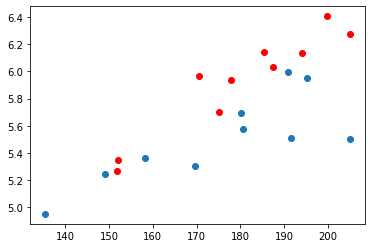

In [10]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()
ax.scatter(simple_data['halo']['kontras'], simple_data['halo']['entropi'])
ax.scatter(simple_data['hai']['kontras'], simple_data['hai']['entropi'], c='red')

In [13]:
df
x=df[['kontras','entropi']]
y=df['jenis']

In [30]:
#not a good result, ga bisa di cluster dengan baik, keliatan sih garis pembatas kalo pake linear regression
#kita paksa coba aja pake knn ya

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=4) #define K=1
knn.fit(x,y)
a=np.array([[150.0,5.2]])
knn.predict(a)

array(['hai'], dtype=object)

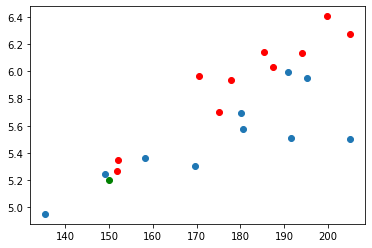

In [31]:
#plot dimana sih si a
fig = plt.figure()
ax = plt.axes()
ax.scatter(simple_data['halo']['kontras'], simple_data['halo']['entropi'])
ax.scatter(simple_data['hai']['kontras'], simple_data['hai']['entropi'], c='red')
ax.scatter(150.0,5.2,c='green')

array(['hai'], dtype=object)

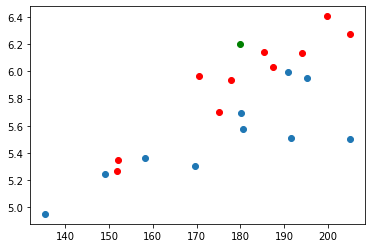

In [32]:
#coba input lain ya hehe
a=np.array([[180.0,6.2]])

fig = plt.figure()
ax = plt.axes()
ax.scatter(simple_data['halo']['kontras'], simple_data['halo']['entropi'])
ax.scatter(simple_data['hai']['kontras'], simple_data['hai']['entropi'], c='red')
ax.scatter(180.0,6.2,c='green')
knn.predict(a)

In [33]:
#dibilangin, kurang bagus wkkwk, kita coba yang lain, kita plot aja dua dua masing2 gitu